Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('C:/Users/Wahab/Documents/DSA/Wine_clust.csv')

In [4]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [6]:
from sklearn.cluster import KMeans

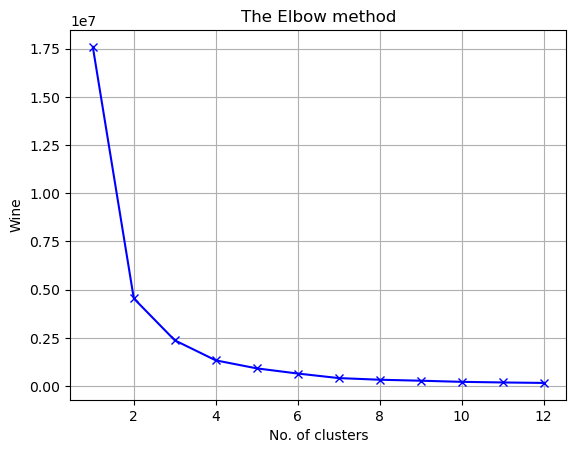

In [7]:
wcss =[]
for i in range(1,13):
    kmeans = KMeans(n_clusters = i,init ="k-means++", random_state=2)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss,'bx-')
plt.title('The Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('Wine')
plt.grid()
plt.show()

# K-Means = 3

In [8]:
data1= data.iloc[:,[3,4]].values

In [9]:
type(data1)

numpy.ndarray

In [10]:
kmeans= KMeans(n_clusters = 3,init="k-means++",random_state=42)
y_kmeans = kmeans.fit_predict(data1)

In [11]:
y_kmeans

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0,
       2, 2, 0, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0,
       0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 1, 0,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1,
       1, 0])

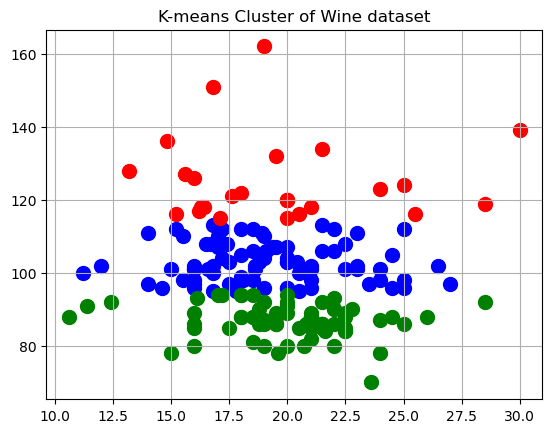

In [12]:
plt.scatter(data1[y_kmeans==0,0],data1[y_kmeans==0,1],s=100,c='blue')
plt.scatter(data1[y_kmeans==1,0],data1[y_kmeans==1,1],s=100,c='red')
plt.scatter(data1[y_kmeans==2,0],data1[y_kmeans==2,1],s=100,c='green')
plt.title('K-means Cluster of Wine dataset')
plt.grid()
plt.show()

# K-Means model with 2 clusters

In [13]:
kmeans= KMeans(n_clusters = 2,init="k-means++",random_state=42)
y_kmeans = kmeans.fit_predict(data1)

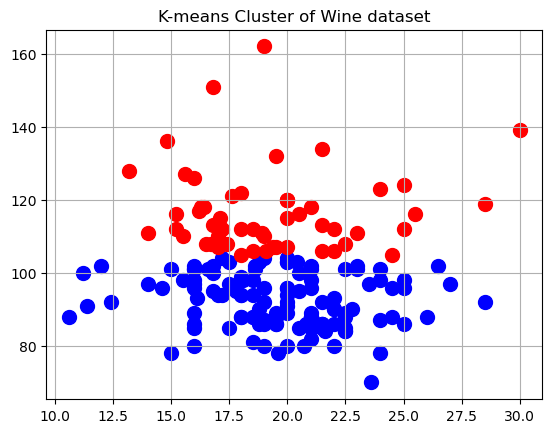

In [14]:
plt.scatter(data1[y_kmeans==0,0],data1[y_kmeans==0,1],s=100,c='blue')
plt.scatter(data1[y_kmeans==1,0],data1[y_kmeans==1,1],s=100,c='red')
plt.scatter(data1[y_kmeans==2,0],data1[y_kmeans==2,1],s=100,c='green')
plt.title('K-means Cluster of Wine dataset')
plt.grid()
plt.show()

# Agglomerative Hierarchical Clustering

In [15]:
import scipy.cluster.hierarchy as sch

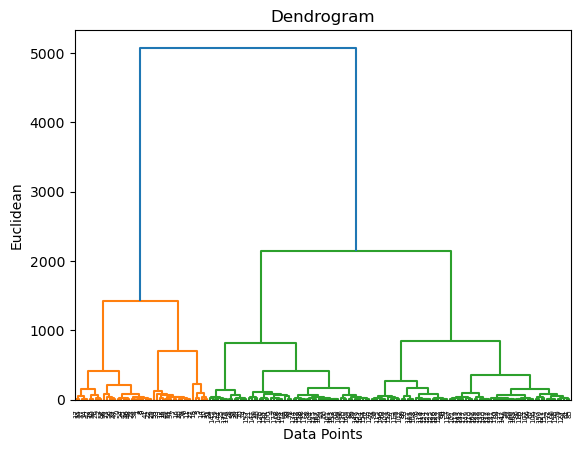

In [16]:
dendrogram = sch.dendrogram(sch.linkage(data, method ='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean')
plt.show()

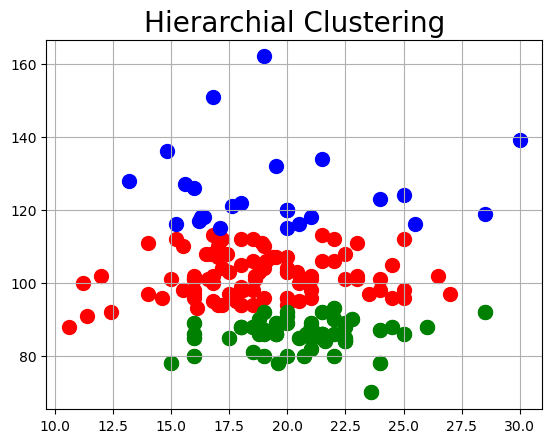

In [17]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data1)

plt.scatter(data1[y_hc == 0, 0], data1[y_hc == 0, 1], s = 100, c = 'red')
plt.scatter(data1[y_hc == 1, 0], data1[y_hc == 1, 1], s = 100, c = 'blue')
plt.scatter(data1[y_hc == 2, 0], data1[y_hc == 2, 1], s = 100, c = 'green')
plt.scatter(data1[y_hc == 2, 0], data1[y_hc == 2, 1], s = 100, c = 'green')

plt.title('Hierarchial Clustering', fontsize = 20)

plt.grid()
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
ahc = AgglomerativeClustering(n_clusters = 3,affinity ='euclidean',linkage='ward')
y_ahc = ahc.fit_predict(data)

In [20]:
y_ahc

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)

In [21]:
from sklearn.metrics import silhouette_score
sil_ahc =silhouette_score(data,y_ahc)

In [22]:
sil_ahc

0.5644796401732071

# Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [24]:
data = pd.read_csv('C:/Users/Wahab/Documents/DSA/Wine_clust.csv')

In [25]:
x= data.iloc[:,[3,4]].values

In [26]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [27]:
model=db.fit(x)

In [28]:
label=model.labels_

In [29]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 2


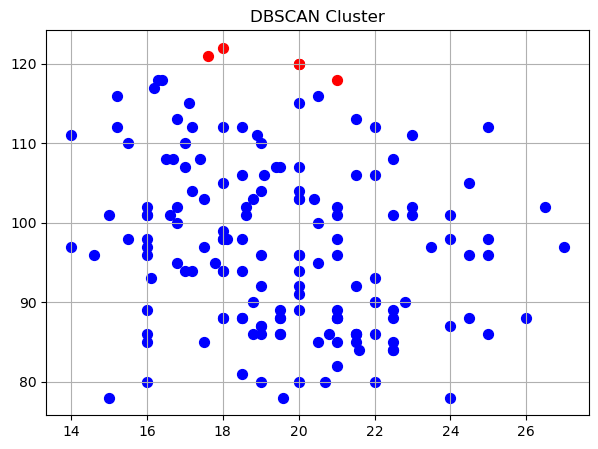

In [30]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'red')

plt.title('DBSCAN Cluster')
plt.grid()
plt.show()